## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Loading the DataSet

In [2]:
dataframe = pd.read_csv("Churn_Modelling.csv")
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dropping the columns RowNumber, CustomerId and Surname as they don't play any role in predicting 

In [3]:
df = dataframe.drop(columns = ["RowNumber", "CustomerId", "Surname"])

## Seperating the Value we want to predict
- Setting all the other attributes a X Input
- Exited a Y because we wan't to predict if a customer will exit in the coming days or not

## One Hot Encoding
- The data categorical value are no good to machine so we label it a numbers
- But giving them numbers makes some high priority and other low without any reason
- So we one hot encode them creating seperating columns
- like gender_male a column and gender_female another

In [4]:
df_X = df[df.columns.difference(['Exited'])]
df_Y = df["Exited"]
dummies = pd.get_dummies(df_X[['Geography', 'Gender']])
df_X = df.drop(columns = ['Geography', 'Gender'])
df_X = pd.concat([df_X, dummies], axis = 1)
display(df_X.head())
display(df_Y.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Standard Scaling then so that all the attributes will have equal weights at input

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_X = scaler.fit_transform(df_X)
df_X = pd.DataFrame(df_X)

## Splitting them to Train and Test data
- Test data is never shown to model except at last so that the real accuracy can be measured

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size = 0.2, random_state = 7)

## Building a neural network

In [14]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout

In [18]:
classifier = Sequential()
classifier.add(Dense(output_dim = 6, init = "uniform", activation = 'relu', input_dim = 14))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(output_dim = 6, init = "uniform", activation = "relu"))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(output_dim = 1, init = "uniform", activation = "sigmoid"))

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


## Compiling the network with optimizers and loss

In [19]:
classifier.compile(optimizer = keras.optimizers.Adam(lr = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

## Fitting the model with back propagation

In [ ]:
classifier.fit(x = X_train, y = Y_train, epochs = 5, validation_split=0.2)

## Checking the model accuracy

In [11]:
def classification_metrics(actual, pred, msg):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(actual, pred)

    plt.figure()
    ax= plt.subplot()
    sns.heatmap(cm, annot = True, fmt = 'g')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['active', 'terminated']) 
    ax.yaxis.set_ticklabels(['active', 'terminated'])   
    plt.show()       
    sensitivity = cm[1][1]/(cm[1][0] + cm[1][1])
    specifity = cm[0][0]/(cm[0][0] + cm[0][1])
    accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
    
    print(msg, '\n')
    print('accuracy:    ', round(accuracy,2), 
      '\nsensitivity: ', round(sensitivity,2), 
      '\nspecifity:   ', round(specifity,2))

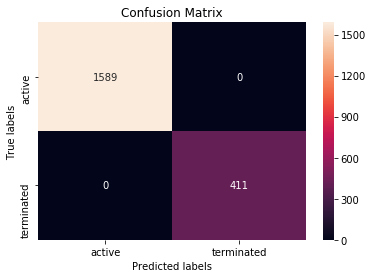

On test data 

accuracy:     1.0 
sensitivity:  1.0 
specifity:    1.0


In [12]:
y_pred = classifier.predict_classes(X_test)
classification_metrics(actual = Y_test, pred = y_pred, msg = "On test data")

In [38]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = 'relu', input_dim = 14))
    classifier.add(Dropout(rate = 0.5))
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = "relu"))
    classifier.add(Dropout(rate = 0.5))
    classifier.add(Dense(output_dim = 1, init = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer = keras.optimizers.Adam(lr = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)

display(accuracies.mean())

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 3s 359us/step - loss: 0.3709 - acc: 0.8656
Epoch 2/10
7200/7200 [==============================] - 1s 192us/step - loss: 0.1570 - acc: 0.9449
Epoch 3/10
7200/7200 [==============================] - 1s 187us/step - loss: 0.1377 - acc: 0.9515
Epoch 4/10
7200/7200 [==============================] - 1s 193us/step - loss: 0.1335 - acc: 0.9564
Epoch 5/10
7200/7200 [==============================] - 1s 198us/step - loss: 0.1285 - acc: 0.9547
Epoch 6/10
7200/7200 [==============================] - 2s 211us/step - loss: 0.1306 - acc: 0.9528
Epoch 7/10
7200/7200 [==============================] - 2s 259us/step - loss: 0.1339 - acc: 0.9471
Epoch 8/10
7200/7200 [==============================] - 2s 231us/step - loss: 0.1311 - acc: 0.9525
Epoch 9/10
7200/7200 [==============================] - 2s 235us/step - loss: 0.1281 - acc: 0.9515
Epoch 10/10
800/800 [==============================] - 0s 350us/step


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 3s 393us/step - loss: 0.4064 - acc: 0.8725
Epoch 2/10
7200/7200 [==============================] - 2s 237us/step - loss: 0.2127 - acc: 0.9143
Epoch 3/10
7200/7200 [==============================] - 1s 190us/step - loss: 0.1974 - acc: 0.9146
Epoch 4/10
7200/7200 [==============================] - 1s 198us/step - loss: 0.1891 - acc: 0.9094
Epoch 5/10
7200/7200 [==============================] - 2s 213us/step - loss: 0.1924 - acc: 0.9071
Epoch 6/10
7200/7200 [==============================] - 1s 200us/step - loss: 0.1837 - acc: 0.9111
Epoch 7/10
7200/7200 [==============================] - 1s 187us/step - loss: 0.1967 - acc: 0.9012
Epoch 8/10
7200/7200 [==============================] - 2s 292us/step - loss: 0.1896 - acc: 0.9076
Epoch 9/10
7200/7200 [==============================] - 2s 223us/step - loss: 0.1915 - acc: 0.9032
Epoch 10/10
800/800 [==============================] - 0s 382us/step


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 3s 374us/step - loss: 0.4089 - acc: 0.7979
Epoch 2/10
7200/7200 [==============================] - 1s 201us/step - loss: 0.2393 - acc: 0.8072
Epoch 3/10
7200/7200 [==============================] - 2s 218us/step - loss: 0.2209 - acc: 0.8818
Epoch 4/10
7200/7200 [==============================] - 1s 199us/step - loss: 0.2108 - acc: 0.8865
Epoch 5/10
7200/7200 [==============================] - 2s 218us/step - loss: 0.2121 - acc: 0.8824
Epoch 6/10
7200/7200 [==============================] - ETA: 0s - loss: 0.2129 - acc: 0.881 - 1s 186us/step - loss: 0.2119 - acc: 0.8815
Epoch 7/10
7200/7200 [==============================] - 1s 200us/step - loss: 0.2118 - acc: 0.8812
Epoch 8/10
7200/7200 [==============================] - 1s 185us/step - loss: 0.2135 - acc: 0.8793
Epoch 9/10
7200/7200 [==============================] - 1s 185us/step - loss: 0.2072 - acc: 0.8856
Epoch 10/10
800/800 [==============================] - 0s 375us/step


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 4s 509us/step - loss: 0.4008 - acc: 0.8278
Epoch 2/10
7200/7200 [==============================] - 1s 207us/step - loss: 0.2034 - acc: 0.8804
Epoch 3/10
7200/7200 [==============================] - 2s 217us/step - loss: 0.1866 - acc: 0.8844
Epoch 4/10
7200/7200 [==============================] - 1s 202us/step - loss: 0.1808 - acc: 0.8837
Epoch 5/10
7200/7200 [==============================] - 1s 183us/step - loss: 0.1765 - acc: 0.8894
Epoch 6/10
7200/7200 [==============================] - 1s 185us/step - loss: 0.1719 - acc: 0.8892
Epoch 7/10
7200/7200 [==============================] - 2s 256us/step - loss: 0.1804 - acc: 0.8822
Epoch 8/10
7200/7200 [==============================] - 1s 187us/step - loss: 0.1755 - acc: 0.8919
Epoch 9/10
7200/7200 [==============================] - 1s 186us/step - loss: 0.1726 - acc: 0.8889
Epoch 10/10
800/800 [==============================] - 0s 475us/step


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 3s 404us/step - loss: 0.4553 - acc: 0.7978
Epoch 2/10
7200/7200 [==============================] - 2s 223us/step - loss: 0.3154 - acc: 0.7976
Epoch 3/10
7200/7200 [==============================] - 2s 231us/step - loss: 0.3065 - acc: 0.7976
Epoch 4/10
7200/7200 [==============================] - 2s 214us/step - loss: 0.3004 - acc: 0.7976
Epoch 5/10
7200/7200 [==============================] - 1s 194us/step - loss: 0.3000 - acc: 0.7976
Epoch 6/10
7200/7200 [==============================] - 2s 236us/step - loss: 0.2985 - acc: 0.7976
Epoch 7/10
7200/7200 [==============================] - 1s 200us/step - loss: 0.2980 - acc: 0.7976
Epoch 8/10
7200/7200 [==============================] - 2s 214us/step - loss: 0.3038 - acc: 0.7976
Epoch 9/10
7200/7200 [==============================] - 2s 212us/step - loss: 0.2924 - acc: 0.7976
Epoch 10/10
800/800 [==============================] - 0s 535us/step


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 4s 523us/step - loss: 0.3860 - acc: 0.8337
Epoch 2/10
7200/7200 [==============================] - 1s 202us/step - loss: 0.1924 - acc: 0.8868
Epoch 3/10
7200/7200 [==============================] - 2s 212us/step - loss: 0.1857 - acc: 0.8837
Epoch 4/10
7200/7200 [==============================] - 2s 217us/step - loss: 0.1777 - acc: 0.8912
Epoch 5/10
7200/7200 [==============================] - 2s 287us/step - loss: 0.1760 - acc: 0.8894
Epoch 6/10
7200/7200 [==============================] - 2s 223us/step - loss: 0.1776 - acc: 0.8879
Epoch 7/10
7200/7200 [==============================] - 1s 188us/step - loss: 0.1838 - acc: 0.8810
Epoch 8/10
7200/7200 [==============================] - 1s 198us/step - loss: 0.1769 - acc: 0.8879
Epoch 9/10
7200/7200 [==============================] - 1s 197us/step - loss: 0.1750 - acc: 0.8897
Epoch 10/10
800/800 [==============================] - 0s 446us/step


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 4s 519us/step - loss: 0.4074 - acc: 0.8737
Epoch 2/10
7200/7200 [==============================] - 1s 196us/step - loss: 0.2255 - acc: 0.9047
Epoch 3/10
7200/7200 [==============================] - 1s 198us/step - loss: 0.2061 - acc: 0.9076
Epoch 4/10
7200/7200 [==============================] - 1s 197us/step - loss: 0.1882 - acc: 0.9108
Epoch 5/10
7200/7200 [==============================] - 1s 198us/step - loss: 0.1895 - acc: 0.9072
Epoch 6/10
7200/7200 [==============================] - 1s 197us/step - loss: 0.1923 - acc: 0.9069
Epoch 7/10
7200/7200 [==============================] - 1s 198us/step - loss: 0.1862 - acc: 0.9049
Epoch 8/10
7200/7200 [==============================] - 1s 200us/step - loss: 0.1920 - acc: 0.9032
Epoch 9/10
7200/7200 [==============================] - 1s 199us/step - loss: 0.1886 - acc: 0.9092
Epoch 10/10
800/800 [==============================] - 0s 575us/step


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 4s 530us/step - loss: 0.3795 - acc: 0.7953
Epoch 2/10
7200/7200 [==============================] - 2s 226us/step - loss: 0.1738 - acc: 0.9237
Epoch 3/10
7200/7200 [==============================] - 1s 194us/step - loss: 0.1440 - acc: 0.9590
Epoch 4/10
7200/7200 [==============================] - 1s 199us/step - loss: 0.1218 - acc: 0.9642
Epoch 5/10
7200/7200 [==============================] - 1s 201us/step - loss: 0.1183 - acc: 0.9594
Epoch 6/10
7200/7200 [==============================] - 1s 199us/step - loss: 0.1137 - acc: 0.9596
Epoch 7/10
7200/7200 [==============================] - 1s 200us/step - loss: 0.1034 - acc: 0.9647
Epoch 8/10
7200/7200 [==============================] - 1s 203us/step - loss: 0.1095 - acc: 0.9601
Epoch 9/10
7200/7200 [==============================] - 1s 198us/step - loss: 0.1048 - acc: 0.9626
Epoch 10/10
800/800 [==============================] - 1s 641us/step


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 3s 431us/step - loss: 0.3787 - acc: 0.8562
Epoch 2/10
7200/7200 [==============================] - 1s 201us/step - loss: 0.1733 - acc: 0.9249
Epoch 3/10
7200/7200 [==============================] - 1s 202us/step - loss: 0.1605 - acc: 0.9256
Epoch 4/10
7200/7200 [==============================] - 1s 202us/step - loss: 0.1607 - acc: 0.9232
Epoch 5/10
7200/7200 [==============================] - 1s 200us/step - loss: 0.1543 - acc: 0.9287
Epoch 6/10
7200/7200 [==============================] - 1s 201us/step - loss: 0.1565 - acc: 0.9262
Epoch 7/10
7200/7200 [==============================] - 1s 201us/step - loss: 0.1525 - acc: 0.9275
Epoch 8/10
7200/7200 [==============================] - 2s 212us/step - loss: 0.1541 - acc: 0.9262
Epoch 9/10
7200/7200 [==============================] - 2s 230us/step - loss: 0.1490 - acc: 0.9336
Epoch 10/10
800/800 [==============================] - 1s 644us/step


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/10
7200/7200 [==============================] - 4s 523us/step - loss: 0.3671 - acc: 0.8699
Epoch 2/10
7200/7200 [==============================] - 1s 202us/step - loss: 0.1751 - acc: 0.9061
Epoch 3/10
7200/7200 [==============================] - 1s 207us/step - loss: 0.1616 - acc: 0.9106
Epoch 4/10
7200/7200 [==============================] - 1s 203us/step - loss: 0.1618 - acc: 0.9092
Epoch 5/10
7200/7200 [==============================] - 1s 203us/step - loss: 0.1322 - acc: 0.9375
Epoch 6/10
7200/7200 [==============================] - 1s 203us/step - loss: 0.1247 - acc: 0.9317
Epoch 7/10
7200/7200 [==============================] - 1s 204us/step - loss: 0.1387 - acc: 0.9235
Epoch 8/10
7200/7200 [==============================] - 1s 205us/step - loss: 0.1293 - acc: 0.9290
Epoch 9/10
7200/7200 [==============================] - 1s 204us/step - loss: 0.1261 - acc: 0.9324
Epoch 10/10
800/800 [==============================] - 1s 960us/step


0.9788749999552966

In [42]:
accuracies.mean()

0.9788749999552966

In [51]:
from sklearn.model_selection import GridSearchCV
def build_classifier(optimizers):
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = 'relu', input_dim = 14))
    classifier.add(Dropout(rate = 0.5))
    classifier.add(Dense(output_dim = 6, init = "uniform", activation = "relu"))
    classifier.add(Dropout(rate = 0.5))
    classifier.add(Dense(output_dim = 1, init = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer = optimizers, loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizers':["adam", "rmsprop"]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, Y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 334us/step - loss: 0.5113 - acc: 0.7958
Epoch 2/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.2485 - acc: 0.7960
Epoch 3/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.1917 - acc: 0.8717
Epoch 4/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.1722 - acc: 0.9522
Epoch 5/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1594 - acc: 0.9518
Epoch 6/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.1493 - acc: 0.9519
Epoch 7/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.1414 - acc: 0.9524
Epoch 8/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.1336 - acc: 0.9543
Epoch 9/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.1329 - acc: 0.9515
Epoch 10/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.1285 - acc: 0.9526
Epoch 11

7200/7200 [==============================] - 1s 91us/step - loss: 0.1226 - acc: 0.9521
Epoch 83/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.1212 - acc: 0.9529
Epoch 84/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1270 - acc: 0.9494
Epoch 85/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.1240 - acc: 0.9512
Epoch 86/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1187 - acc: 0.9544
Epoch 87/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.1270 - acc: 0.9494
Epoch 88/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.1198 - acc: 0.9537
Epoch 89/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.1156 - acc: 0.9562
Epoch 90/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.1210 - acc: 0.9531
Epoch 91/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1193 - acc: 0.9540
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 366us/step - loss: 0.5825 - acc: 0.8826
Epoch 2/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3167 - acc: 0.9626
Epoch 3/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.2454 - acc: 0.9662
Epoch 4/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.2219 - acc: 0.9642
Epoch 5/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.2028 - acc: 0.9629
Epoch 6/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.1824 - acc: 0.9654
Epoch 7/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.1824 - acc: 0.9586
Epoch 8/100
7200/7200 [==============================] - 1s 107us/step - loss: 0.1706 - acc: 0.9600
Epoch 9/100
7200/7200 [==============================] - 1s 112us/step - loss: 0.1555 - acc: 0.9643
Epoch 10/100
7200/7200 [==============================] - 1s 113us/step - loss: 0.1439 - acc: 0.9662
Ep

7200/7200 [==============================] - 1s 90us/step - loss: 0.1242 - acc: 0.9632
Epoch 83/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.1246 - acc: 0.9622
Epoch 84/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.1198 - acc: 0.9621
Epoch 85/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.1217 - acc: 0.9635
Epoch 86/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1252 - acc: 0.9622
Epoch 87/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1239 - acc: 0.9621
Epoch 88/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.1163 - acc: 0.9647
Epoch 89/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1228 - acc: 0.9626
Epoch 90/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.1245 - acc: 0.9622
Epoch 91/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1189 - acc: 0.9637
Epoch 92/100

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 345us/step - loss: 0.5331 - acc: 0.8228
Epoch 2/100
7200/7200 [==============================] - 1s 106us/step - loss: 0.2258 - acc: 0.8818
Epoch 3/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.1623 - acc: 0.9186
Epoch 4/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.1396 - acc: 0.9296
Epoch 5/100
7200/7200 [==============================] - 1s 106us/step - loss: 0.1325 - acc: 0.9306
Epoch 6/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.1266 - acc: 0.9310
Epoch 7/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.1266 - acc: 0.9290
Epoch 8/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.1252 - acc: 0.9350
Epoch 9/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.1249 - acc: 0.9324
Epoch 10/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.1272 - acc: 0.9244
Ep

7200/7200 [==============================] - 2s 285us/step - loss: 0.1244 - acc: 0.9211
Epoch 83/100
7200/7200 [==============================] - 1s 203us/step - loss: 0.1253 - acc: 0.9224
Epoch 84/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.1237 - acc: 0.9307
Epoch 85/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.1187 - acc: 0.9310
Epoch 86/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.1158 - acc: 0.9293
Epoch 87/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.1147 - acc: 0.9322
Epoch 88/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.1241 - acc: 0.9250
Epoch 89/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.1217 - acc: 0.9250
Epoch 90/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.1240 - acc: 0.9261
Epoch 91/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.1227 - acc: 0.9286
Epoch 9

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 362us/step - loss: 0.5243 - acc: 0.8346
Epoch 2/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.2121 - acc: 0.9274
Epoch 3/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1604 - acc: 0.9253
Epoch 4/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1405 - acc: 0.9317
Epoch 5/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.1362 - acc: 0.9344
Epoch 6/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1359 - acc: 0.9314
Epoch 7/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1411 - acc: 0.9299
Epoch 8/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.1359 - acc: 0.9293
Epoch 9/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1401 - acc: 0.9262
Epoch 10/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.1345 - acc: 0.9278
Epoch 1

7200/7200 [==============================] - 1s 76us/step - loss: 0.1328 - acc: 0.9301
Epoch 83/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1290 - acc: 0.9331
Epoch 84/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.1367 - acc: 0.9279
Epoch 85/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1280 - acc: 0.9358
Epoch 86/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.1272 - acc: 0.9344
Epoch 87/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.1332 - acc: 0.9296
Epoch 88/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.1348 - acc: 0.9282
Epoch 89/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1347 - acc: 0.9279
Epoch 90/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.1376 - acc: 0.9272
Epoch 91/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.1315 - acc: 0.9290
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 287us/step - loss: 0.5086 - acc: 0.7975
Epoch 2/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.2613 - acc: 0.7976
Epoch 3/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.2017 - acc: 0.8482
Epoch 4/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1726 - acc: 0.9537
Epoch 5/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1568 - acc: 0.9553
Epoch 6/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1497 - acc: 0.9512
Epoch 7/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1471 - acc: 0.9471
Epoch 8/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1386 - acc: 0.9500
Epoch 9/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1321 - acc: 0.9522
Epoch 10/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1294 - acc: 0.9519
Epoch 11

7200/7200 [==============================] - 1s 77us/step - loss: 0.1231 - acc: 0.9515
Epoch 83/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1241 - acc: 0.9510
Epoch 84/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1216 - acc: 0.9525: 0s - loss: 0.1155 - acc
Epoch 85/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1238 - acc: 0.9511
Epoch 86/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1218 - acc: 0.9524
Epoch 87/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1206 - acc: 0.9531
Epoch 88/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1305 - acc: 0.9471
Epoch 89/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1241 - acc: 0.9510
Epoch 90/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1293 - acc: 0.9478
Epoch 91/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1310 - 

C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 293us/step - loss: 0.5025 - acc: 0.7983
Epoch 2/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.2525 - acc: 0.7985
Epoch 3/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1874 - acc: 0.8782
Epoch 4/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1666 - acc: 0.9569
Epoch 5/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.1513 - acc: 0.9586
Epoch 6/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1387 - acc: 0.9604
Epoch 7/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1371 - acc: 0.9543
Epoch 8/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1240 - acc: 0.9610
Epoch 9/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1262 - acc: 0.9554
Epoch 10/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.1221 - acc: 0.9562
Epoch 11

7200/7200 [==============================] - 1s 85us/step - loss: 0.1155 - acc: 0.9560
Epoch 84/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.1189 - acc: 0.9540
Epoch 85/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.1203 - acc: 0.9532
Epoch 86/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1055 - acc: 0.9618
Epoch 87/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1194 - acc: 0.9537
Epoch 88/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1134 - acc: 0.9572
Epoch 89/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1095 - acc: 0.9594
Epoch 90/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1167 - acc: 0.9553
Epoch 91/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1138 - acc: 0.9569
Epoch 92/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.1138 - acc: 0.9569
Epoch 93/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 299us/step - loss: 0.5573 - acc: 0.7946
Epoch 2/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.3164 - acc: 0.7954
Epoch 3/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.2484 - acc: 0.7954
Epoch 4/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.2359 - acc: 0.7990
Epoch 5/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.2224 - acc: 0.8874
Epoch 6/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.2201 - acc: 0.8836
Epoch 7/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.2183 - acc: 0.8817
Epoch 8/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.2135 - acc: 0.8847
Epoch 9/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.2101 - acc: 0.8867
Epoch 10/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.2080 - acc: 0.8878
Epoch 11

7200/7200 [==============================] - 1s 79us/step - loss: 0.2087 - acc: 0.8851
Epoch 83/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.2121 - acc: 0.8818
Epoch 84/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.2158 - acc: 0.8782
Epoch 85/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.2088 - acc: 0.8850
Epoch 86/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.2053 - acc: 0.8885
Epoch 87/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.2094 - acc: 0.8844
Epoch 88/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.2082 - acc: 0.8856
Epoch 89/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.2061 - acc: 0.8876
Epoch 90/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.2125 - acc: 0.8814
Epoch 91/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.2017 - acc: 0.8919
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 306us/step - loss: 0.5928 - acc: 0.8046
Epoch 2/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.3312 - acc: 0.8489
Epoch 3/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.2764 - acc: 0.8676
Epoch 4/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2569 - acc: 0.8767
Epoch 5/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2482 - acc: 0.8806
Epoch 6/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2400 - acc: 0.8814
Epoch 7/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2385 - acc: 0.8794
Epoch 8/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2348 - acc: 0.8836
Epoch 9/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2460 - acc: 0.8740
Epoch 10/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2430 - acc: 0.8765
Epoch 11

7200/7200 [==============================] - 1s 81us/step - loss: 0.2410 - acc: 0.8792
Epoch 83/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2422 - acc: 0.8735
Epoch 84/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2445 - acc: 0.8737
Epoch 85/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2404 - acc: 0.8765
Epoch 86/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2421 - acc: 0.8762
Epoch 87/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2381 - acc: 0.8822
Epoch 88/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2434 - acc: 0.8739
Epoch 89/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.2337 - acc: 0.8822
Epoch 90/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.2435 - acc: 0.8751
Epoch 91/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.2369 - acc: 0.8794
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 313us/step - loss: 0.5281 - acc: 0.7982
Epoch 2/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.2319 - acc: 0.7990
Epoch 3/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1706 - acc: 0.8950
Epoch 4/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.1498 - acc: 0.9757
Epoch 5/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1377 - acc: 0.9726
Epoch 6/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1245 - acc: 0.9731
Epoch 7/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1093 - acc: 0.9778
Epoch 8/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1010 - acc: 0.9778
Epoch 9/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.0984 - acc: 0.9749
Epoch 10/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.0953 - acc: 0.9737
Epoch 11

7200/7200 [==============================] - 1s 80us/step - loss: 0.0749 - acc: 0.9767
Epoch 84/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.0832 - acc: 0.9729
Epoch 85/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.0718 - acc: 0.9781
Epoch 86/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.0758 - acc: 0.9762
Epoch 87/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.0755 - acc: 0.9764
Epoch 88/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.0777 - acc: 0.9754
Epoch 89/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.0780 - acc: 0.9753
Epoch 90/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.0765 - acc: 0.9760
Epoch 91/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.0817 - acc: 0.9736
Epoch 92/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.0780 - acc: 0.9753
Epoch 93/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 321us/step - loss: 0.5686 - acc: 0.7950
Epoch 2/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.3079 - acc: 0.7961
Epoch 3/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2443 - acc: 0.7961
Epoch 4/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2311 - acc: 0.8014
Epoch 5/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2222 - acc: 0.8869
Epoch 6/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.2167 - acc: 0.8872
Epoch 7/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.2123 - acc: 0.8881
Epoch 8/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2098 - acc: 0.8881
Epoch 9/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.2136 - acc: 0.8822
Epoch 10/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.2100 - acc: 0.8854
Epoch 11

Epoch 83/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1999 - acc: 0.8933
Epoch 84/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2042 - acc: 0.8892
Epoch 85/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2047 - acc: 0.8887
Epoch 86/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2067 - acc: 0.8868
Epoch 87/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2078 - acc: 0.8857
Epoch 88/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2079 - acc: 0.8856
Epoch 89/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2051 - acc: 0.8883
Epoch 90/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2087 - acc: 0.8849
Epoch 91/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2091 - acc: 0.8844
Epoch 92/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2079 - acc: 0.8856


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 318us/step - loss: 0.5901 - acc: 0.7960
Epoch 2/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.3320 - acc: 0.8567
Epoch 3/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.1928 - acc: 0.9079
Epoch 4/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1487 - acc: 0.9107
Epoch 5/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1327 - acc: 0.9147
Epoch 6/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1328 - acc: 0.9090
Epoch 7/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1302 - acc: 0.9149
Epoch 8/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1324 - acc: 0.9099
Epoch 9/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1248 - acc: 0.9158
Epoch 10/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1359 - acc: 0.9053
Epoch 11

7200/7200 [==============================] - 1s 81us/step - loss: 0.1268 - acc: 0.9125
Epoch 83/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1321 - acc: 0.9079
Epoch 84/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1322 - acc: 0.9067
Epoch 85/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1291 - acc: 0.9126
Epoch 86/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1230 - acc: 0.9190
Epoch 87/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1328 - acc: 0.9087
Epoch 88/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.1296 - acc: 0.9081
Epoch 89/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1313 - acc: 0.9081
Epoch 90/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1309 - acc: 0.9078
Epoch 91/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1299 - acc: 0.9094
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 358us/step - loss: 0.6239 - acc: 0.7928
Epoch 2/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.4582 - acc: 0.7940
Epoch 3/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.3203 - acc: 0.7940
Epoch 4/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.2450 - acc: 0.7940
Epoch 5/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2287 - acc: 0.8087
Epoch 6/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.2165 - acc: 0.8883
Epoch 7/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2132 - acc: 0.8861
Epoch 8/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2052 - acc: 0.8922
Epoch 9/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2030 - acc: 0.8928
Epoch 10/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2017 - acc: 0.8932
Epoch 11

Epoch 83/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2079 - acc: 0.8865
Epoch 84/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2050 - acc: 0.8893
Epoch 85/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2051 - acc: 0.8892
Epoch 86/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1995 - acc: 0.8944
Epoch 87/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.2022 - acc: 0.8919
Epoch 88/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.2036 - acc: 0.8906
Epoch 89/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.2020 - acc: 0.8921
Epoch 90/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.2045 - acc: 0.8897
Epoch 91/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1983 - acc: 0.8956
Epoch 92/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.2068 - acc: 0.8876


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 363us/step - loss: 0.5907 - acc: 0.8256
Epoch 2/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.3045 - acc: 0.9303
Epoch 3/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1633 - acc: 0.9435
Epoch 4/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1440 - acc: 0.9399
Epoch 5/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1388 - acc: 0.9407
Epoch 6/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1467 - acc: 0.9382
Epoch 7/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1381 - acc: 0.9418
Epoch 8/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1467 - acc: 0.9389
Epoch 9/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1381 - acc: 0.9393
Epoch 10/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1476 - acc: 0.9350
Epoch 11

7200/7200 [==============================] - 1s 81us/step - loss: 0.1404 - acc: 0.9387
Epoch 84/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1385 - acc: 0.9407
Epoch 85/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1415 - acc: 0.9385
Epoch 86/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1356 - acc: 0.9412
Epoch 87/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.1350 - acc: 0.9419
Epoch 88/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.1401 - acc: 0.9390
Epoch 89/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1372 - acc: 0.9404
Epoch 90/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1412 - acc: 0.9385
Epoch 91/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1378 - acc: 0.9399
Epoch 92/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1445 - acc: 0.9337
Epoch 93/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 367us/step - loss: 0.5407 - acc: 0.7967
Epoch 2/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.2747 - acc: 0.8454
Epoch 3/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.1733 - acc: 0.8749
Epoch 4/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.1290 - acc: 0.9494
Epoch 5/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.1167 - acc: 0.9522
Epoch 6/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.1098 - acc: 0.9546
Epoch 7/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.1170 - acc: 0.9494
Epoch 8/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.1109 - acc: 0.9533
Epoch 9/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1112 - acc: 0.9518
Epoch 10/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.1130 - acc: 0.9506
Epoch 11

7200/7200 [==============================] - 1s 82us/step - loss: 0.1124 - acc: 0.9503
Epoch 83/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1180 - acc: 0.9453
Epoch 84/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1210 - acc: 0.9439
Epoch 85/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1056 - acc: 0.9550
Epoch 86/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1044 - acc: 0.9557
Epoch 87/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1079 - acc: 0.9539
Epoch 88/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1145 - acc: 0.9482
Epoch 89/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1146 - acc: 0.9489
Epoch 90/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.1128 - acc: 0.9501
Epoch 91/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1136 - acc: 0.9486
Epoch 92/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 2s 338us/step - loss: 0.5629 - acc: 0.7969
Epoch 2/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.2767 - acc: 0.8590
Epoch 3/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.1870 - acc: 0.8694
Epoch 4/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.1557 - acc: 0.9157
Epoch 5/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.1458 - acc: 0.9240
Epoch 6/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.1437 - acc: 0.9194
Epoch 7/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.1405 - acc: 0.9197
Epoch 8/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.1440 - acc: 0.9165
Epoch 9/100
7200/7200 [==============================] - 1s 89us/step - loss: 0.1382 - acc: 0.9225
Epoch 10/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.1388 - acc: 0.9218
Epoch 11

7200/7200 [==============================] - 1s 83us/step - loss: 0.1354 - acc: 0.9214
Epoch 84/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.1370 - acc: 0.9165
Epoch 85/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.1358 - acc: 0.9218
Epoch 86/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.1316 - acc: 0.9208
Epoch 87/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1368 - acc: 0.9192
Epoch 88/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1351 - acc: 0.9212
Epoch 89/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.1354 - acc: 0.9169
Epoch 90/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.1355 - acc: 0.9224
Epoch 91/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1349 - acc: 0.9215
Epoch 92/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.1340 - acc: 0.9208
Epoch 93/100


C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\97798\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/100
7200/7200 [==============================] - 3s 414us/step - loss: 0.5949 - acc: 0.7982
Epoch 2/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3765 - acc: 0.8312
Epoch 3/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.2630 - acc: 0.8504
Epoch 4/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.2188 - acc: 0.8681: 0s - loss: 0.2227 - acc
Epoch 5/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.2132 - acc: 0.8685
Epoch 6/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.2086 - acc: 0.8658
Epoch 7/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.2015 - acc: 0.8692
Epoch 8/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.1920 - acc: 0.8643
Epoch 9/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.1850 - acc: 0.8647
Epoch 10/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.

KeyboardInterrupt: 